# Titel

Students: Casper Sikkema, Joshua Appiah

Team Number: B6


## Inhoudsopgave:
* [Introduction](#Introduction)
* [Dataset and Preprocessing](#Dataset-and-Preprocessing)
* [Reflection](#Reflection)
* [Work Distribution](#work-distribution)
* [References](#references)


## Introduction

TODO: Describe the topic, perspectives, and arguments.

Schiphol Airport, the largest airport in the Netherlands, welcomed 62 million passengers in 2023. With its 65,000 employees, Schiphol has a significant positive influence on the Dutch economy. However, Schiphol also has a substantial negative impact on local residents and the environment. The primary concerns include the emission of fine particulate matter and noise pollution from airplanes. The limit on the number of aircraft movements at Schiphol has therefore been a much-discussed topic since 2008, when it was decided that a ceiling of 500,000 flights would be implemented until 2020. Afterward, the total aircraft movements were to decrease by 10% every year as proposed by the Dutch Parliament. However, due to pressure from companies like KLM and countries like the United States and Canada, the proposed reduction of Schiphol's operations has been delayed. To accommodate local residents, Schiphol has decided to reduce the movement of private airplanes and implement a "nightstop" from 00:00 to 05:00 starting in 2025/2026.

This data story, on behalf of "Data Visualization" at the University of Amsterdam, will explore the total aircraft movements at Schiphol Airport from 1992 to the present and their influence on the emission of harmful substances. In particular, we will examine the correlation between total aircraft movements, cargo (in tonnes), and emissions (in kg). Datasets provided by Schiphol and the 'Rijksoverheid' will be used.

First, we will provide an insight into the datasets used, including how they were found and processed. Following this, we will discuss the perspectives and arguments using visualization components and text. To conclude, a reflection and work distribution will be provided


In [1]:
# Packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset and Preprocessing

TODO: Provide information about the datasets (e.g., where to download them, what
are the variables in there) and also explain how you preprocess the data.

In [2]:
# Load the Schiphol Traffic dataset

df = pd.read_csv("Traffic_Data_Cleaned.csv")
df

,Year,Month,Air_Transport_Movements_Europe,Air_Transport_Movements_Intercontinental,Total_Air_Transport_Movements,Passengers_Europe,Passengers_Intercontinental,Passengers_Total*,Passengers_O&D,Passengers_Transfer,Passengers_Total*.1,Passengers_Scheduled,Passengers_Non_Scheduled,Passengers_Transit_direct,Passengers_Total,Cargo (tonnes),Mail (tonnes)
0,1992,January,14.716,2.955,17.671,726.163,423.659,1.149.822,739.774,410.048,1.149.822,1.051.816,98.006,35.052,1.184.874,50.457,2.166
1,NaN,February,14.030,2.779,16.809,719.055,367.924,1.086.979,728.823,358.156,1.086.979,997.218,89.761,30.491,1.117.470,56.180,2.154
2,NaN,March,15.454,2.998,18.452,847.487,429.187,1.276.674,866.246,410.428,1.276.674,1.160.363,116.311,32.161,1.308.835,64.284,2.242
3,NaN,April,16.649,3.011,19.660,1.056.108,466.414,1.522.522,1.065.468,457.054,1.522.522,1.307.113,215.409,32.640,1.555.162,56.924,2.252
4,NaN,May,17.591,3.167,20.758,1.223.278,518.839,1.742.117,1.276.443,465.674,1.742.117,1.411.578,330.539,34.620,1.776.737,58.328,2.232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_csv("Traffic_Data_Cleaned.csv")

# Remove the specified columns


# Convert the specified columns to floats
columns_to_convert = [
    "Air_Transport_Movements_Europe", 
    "Air_Transport_Movements_Intercontinental", 
    "Total_Air_Transport_Movements", 
    "Passengers_Total", 
    "Cargo (tonnes)", 
    "Mail (tonnes)"
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column].astype(str).str.replace('.', '').str.replace(',', '.'), errors='coerce')

#df_yearly = df.groupby('Year').sum(numeric_only=True).reset_index()

#df_yearly
df

,Year,Month,Air_Transport_Movements_Europe,Air_Transport_Movements_Intercontinental,Total_Air_Transport_Movements,Passengers_Europe,Passengers_Intercontinental,Passengers_Total*,Passengers_O&D,Passengers_Transfer,Passengers_Total*.1,Passengers_Scheduled,Passengers_Non_Scheduled,Passengers_Transit_direct,Passengers_Total,Cargo (tonnes),Mail (tonnes)
0,1992,January,14716.0,2955.0,17671.0,726.163,423.659,1.149.822,739.774,410.048,1.149.822,1.051.816,98.006,35.052,1184874.0,50457.0,2166.0
1,NaN,February,14030.0,2779.0,16809.0,719.055,367.924,1.086.979,728.823,358.156,1.086.979,997.218,89.761,30.491,1117470.0,5618.0,2154.0
2,NaN,March,15454.0,2998.0,18452.0,847.487,429.187,1.276.674,866.246,410.428,1.276.674,1.160.363,116.311,32.161,1308835.0,64284.0,2242.0
3,NaN,April,16649.0,3011.0,19660.0,1.056.108,466.414,1.522.522,1.065.468,457.054,1.522.522,1.307.113,215.409,32.640,1555162.0,56924.0,2252.0
4,NaN,May,17591.0,3167.0,20758.0,1.223.278,518.839,1.742.117,1.276.443,465.674,1.742.117,1.411.578,330.539,34.620,1776737.0,58328.0,2232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Load the Schiphol Emissie dataset

df2 = pd.read_csv("Schiphol_Emissie_Cleaned.csv")
df2

# https://www.emissieregistratie.nl/data/vliegvelden

,EMISSIEJAAR,VLIEGVELD,VLIEGVELD_CODE,STOFNAAM,STOF_CODE,COMPARTIMENT,COMPARTIMENT_CODE,EMISSIEOORZAAK,EMISSIEOORZAAK_CODE,EMISSIE (kg)
0,1990,Vliegveld Luchthaven Schiphol,220801,Anthraceen,535,Lucht,10,"Vliegverkeer, APU",930005,"0,010647538"
1,1990,Vliegveld Luchthaven Schiphol,220801,Benzeen,515,Lucht,10,"Vliegverkeer, APU",930005,"109,275126"
2,1990,Vliegveld Luchthaven Schiphol,220801,Benzo(a)Pyreen,539,Lucht,10,"Vliegverkeer, APU",930005,"0,003642579"
3,1990,Vliegveld Luchthaven Schiphol,220801,Benzo(b)Fluorantheen,540,Lucht,10,"Vliegverkeer, APU",930005,"0,007285158"
4,1990,Vliegveld Luchthaven Schiphol,220801,Benzo(k)Fluorantheen,541,Lucht,10,"Vliegverkeer, APU",930005,"0,001905349"
...,...,...,...,...,...,...,...,...,...,...
2955,2022,Vliegveld Luchthaven Schiphol,220801,Loodverb. (als Pb),111,Lucht,10,"Vliegverkeer, Remslijtage",930009,"2,177753808"
2956,2022,Vliegveld Luchthaven Schiphol,220801,Nikkelverb. (als Ni),114,Lucht,10,"Vliegverkeer, Remslijtage",930009,"5,008833758"
2957,2022,Vliegveld Luchthaven Schiphol,220801,TSP (Totaal stof),999,Lucht,10,"Vliegverkeer, Remslijtage",930009,"5444,384519"
2958,2022,Vliegveld Luchthaven Schiphol,220801,Zinkverb. (als Zn),120,Lucht,10,"Vliegverkeer, Remslijtage",930009,"81,66576779"


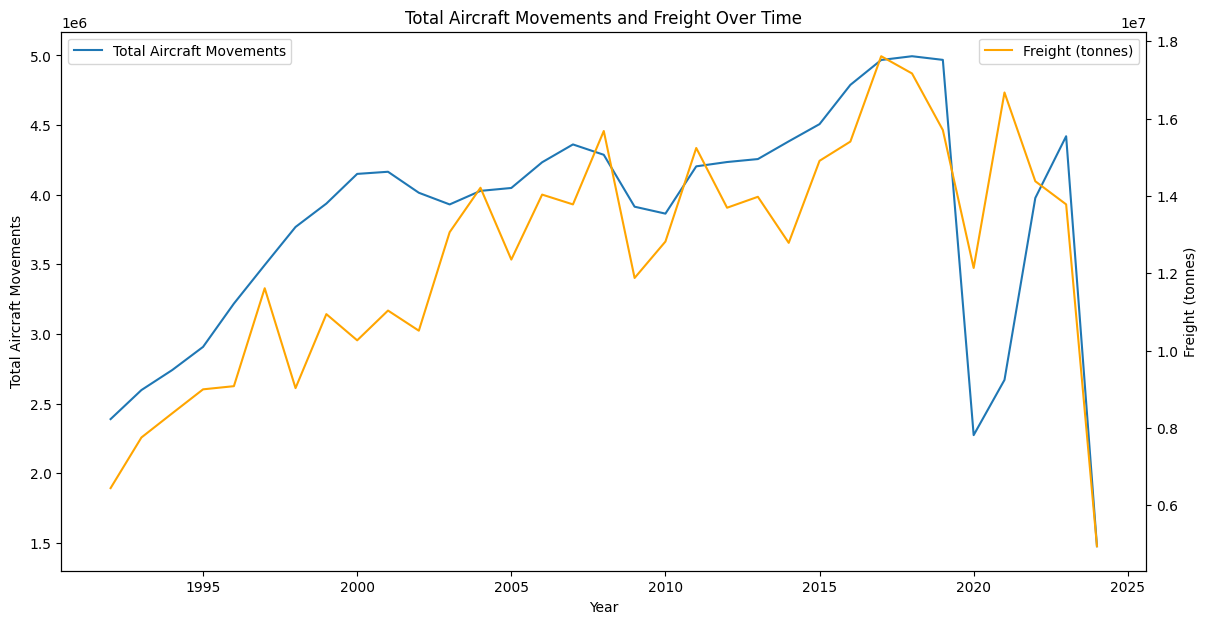

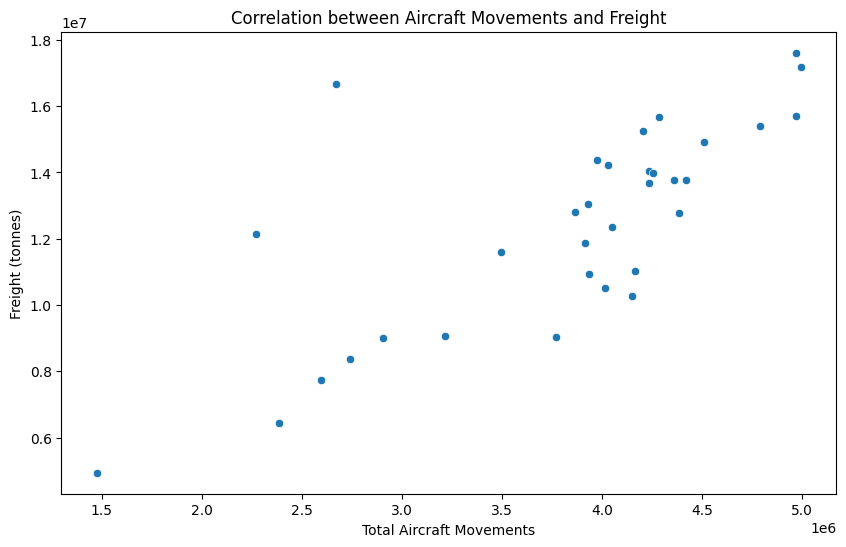

In [5]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = df['Year'].ffill()

# Function to clean numeric columns
def clean_numeric(column):
    column = column.astype(str).str.replace('.', '', regex=False).str.replace(',', '', regex=False)
    column = pd.to_numeric(column, errors='coerce')
    return column

# Clean the relevant columns
df['Total_Air_Transport_Movements'] = clean_numeric(df['Total_Air_Transport_Movements'])
df['Passengers_Total'] = clean_numeric(df['Passengers_Total'])
df['Cargo (tonnes)'] = clean_numeric(df['Cargo (tonnes)'])

# Drop any rows where 'Total_Air_Transport_Movements' or 'Cargo (tonnes)' is NaN
df = df.dropna(subset=['Total_Air_Transport_Movements', 'Cargo (tonnes)'])

# Group by 'Year' and sum the necessary columns
df_grouped = df.groupby('Year')[['Total_Air_Transport_Movements', 'Passengers_Total', 'Cargo (tonnes)']].sum().reset_index()

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the total number of aircraft movements
sns.lineplot(x='Year', y='Total_Air_Transport_Movements', data=df_grouped, ax=ax1, label='Total Aircraft Movements')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Aircraft Movements')
ax1.legend(loc='upper left')
ax1.set_title('Total Aircraft Movements and Freight Over Time')

# Create a second y-axis for the freight
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Cargo (tonnes)', data=df_grouped, ax=ax2, color='orange', label='Freight (tonnes)')
ax2.set_ylabel('Freight (tonnes)')
ax2.legend(loc='upper right')

plt.show()

# Scatter plot for correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Air_Transport_Movements', y='Cargo (tonnes)', data=df_grouped)
plt.xlabel('Total Aircraft Movements')
plt.ylabel('Freight (tonnes)')
plt.title('Correlation between Aircraft Movements and Freight')
plt.show()

## Reflection

TODO: Describe how the feedback from your TA and/or your peers helps you improve
your data story. Also, describe self-reflections (if any) using the design
guidelines about how to evaluate visualizations that we taught in the lectures.

## Work Distribution

TODO: Explain the distribution of work among the team members (i.e., describing who
is responsible for what)

## References